<a href="https://colab.research.google.com/github/MehwishSameer/LetsGrowMore/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important terms that I explore:

* Pruning: Removing unwanted branches from tree.
* Splitting: Dividing the root/sub node into different parts on the basis of some condition.

In [29]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 838 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=489f1937742310498eff855015f987c2a6ced3c8ea01958654945cf6bf09e132
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [34]:
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, accuracy_score, r2_score
from six import StringIO
from IPython.display import Image
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from dtreeviz.trees import dtreeviz
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pydotplus
import graphviz
import os
import warnings
labelencoder=LabelEncoder()
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv('/content/drive/My Drive/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc92d87ca10>,
      dtype=object)

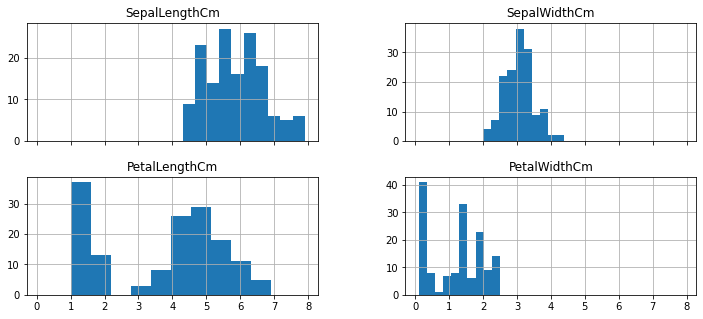

In [5]:
df1=df.drop(['Id','Species'],axis=1, inplace=False)
fig,graph = plt.subplots(2,2,sharex=True, figsize=(12,5))
df1.hist(ax=graph, figsize=(8,4))

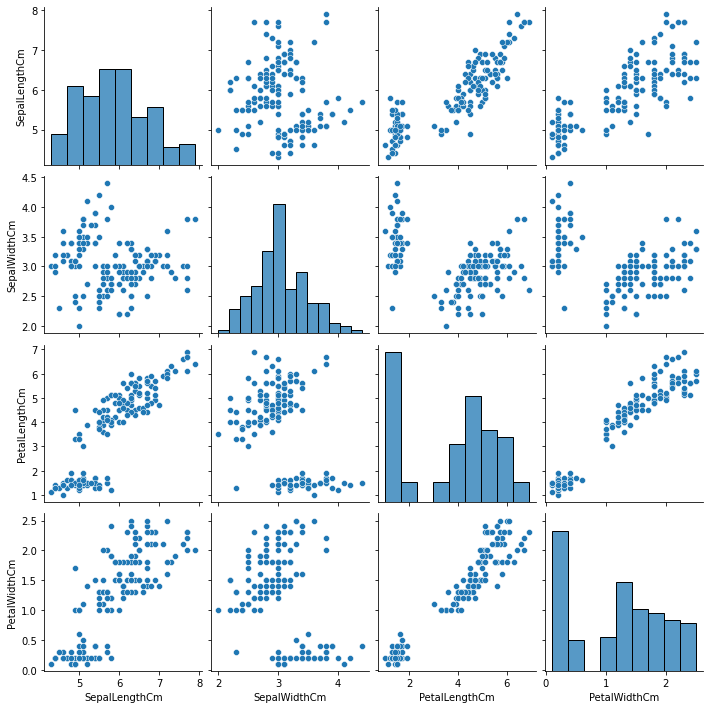

In [6]:
sns.pairplot(df1)

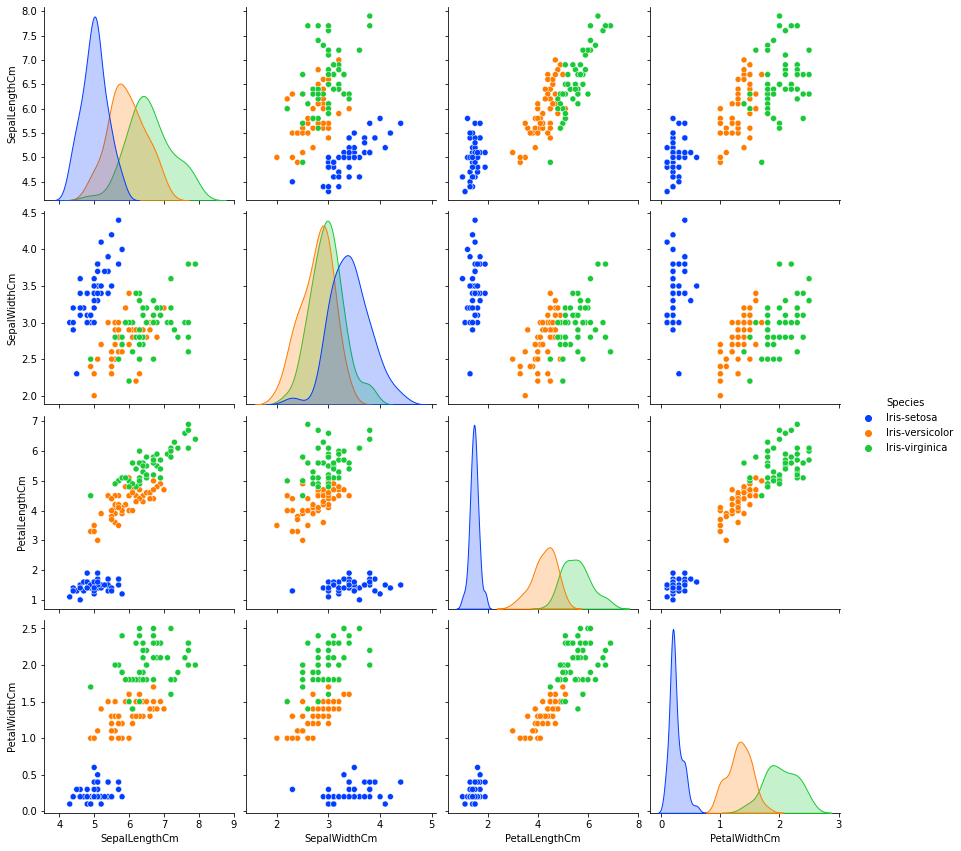

In [7]:
df2=df.drop(['Id'],axis=1, inplace=False)
sns.pairplot(df2,hue="Species",palette="bright",diag_kind="auto",size=3)

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(df1,df[['Species']],test_size=0.25,random_state=0)

In [16]:
d_t=DecisionTreeClassifier()

In [17]:
d_t.fit(df1,df[['Species']])

DecisionTreeClassifier()

In [19]:
d_t.fit(X_train,Y_train)
predic=d_t.predict(X_test)

In [21]:
accuracy_score(Y_test,predic)

0.9736842105263158

In [22]:
confusion_matrix(Y_test,predic)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [26]:
y=list(df1.columns)
target=df['Species'].unique()
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

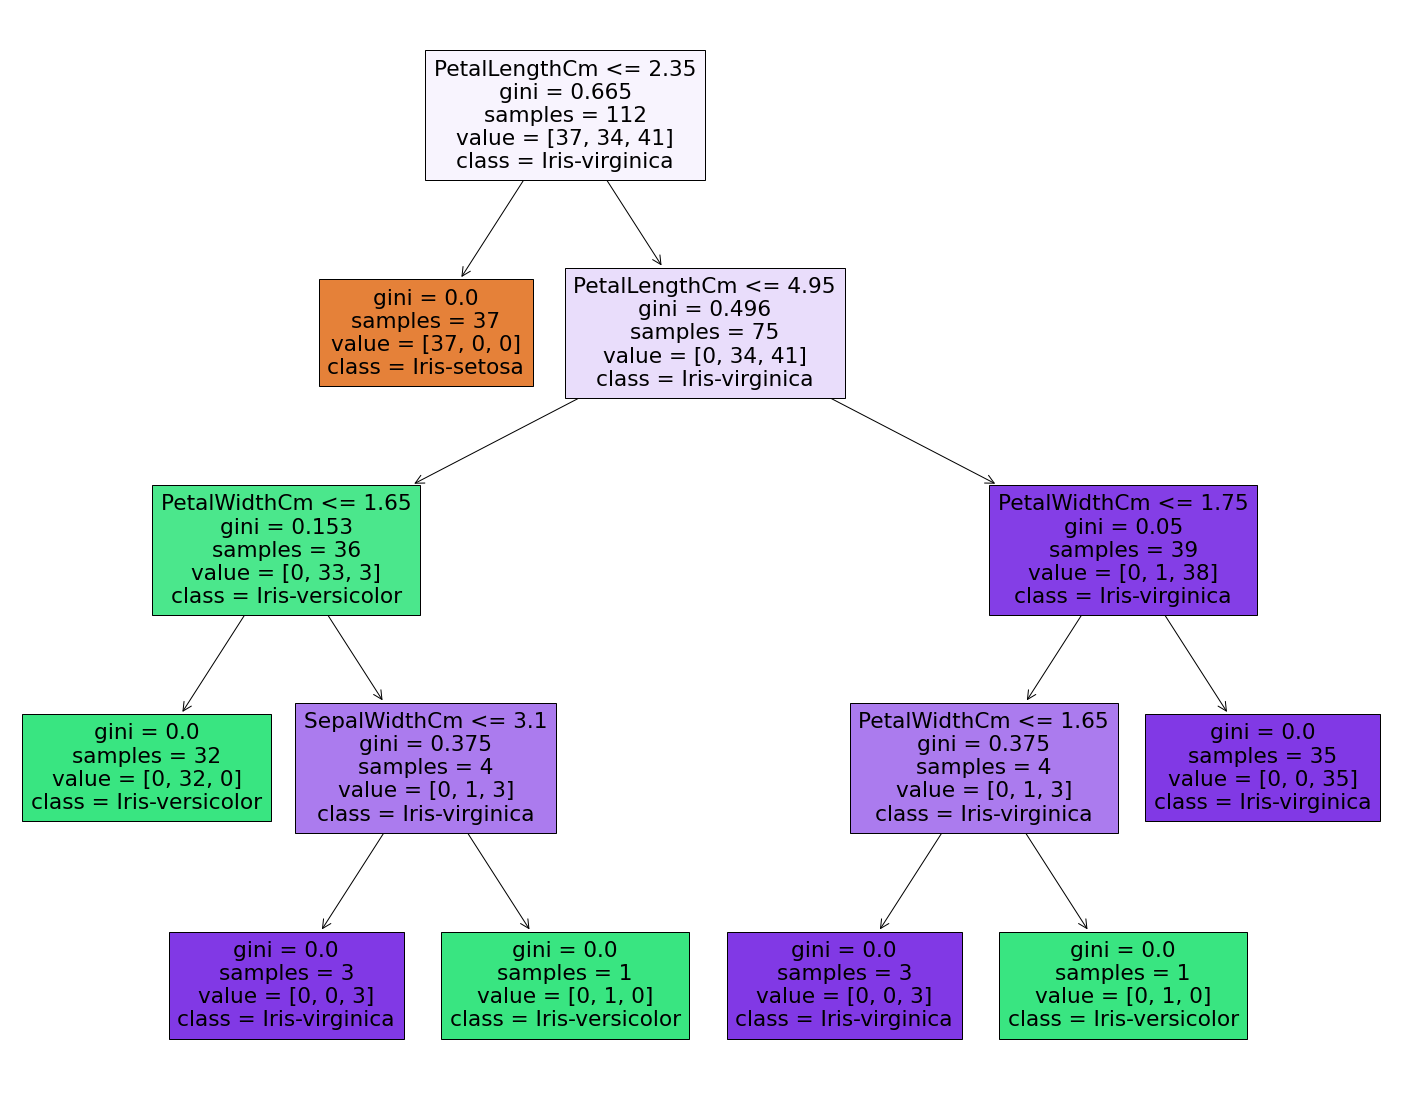

In [28]:
fig= plt.figure(figsize=(25,20))
DecisionTree=tree.plot_tree(d_t,feature_names=y,class_names=target,filled=True)

In [39]:
X=np.array(df1)
Y=np.array(labelencoder.fit_transform(df[['Species']]))
clf=DecisionTreeClassifier(random_state=1234)
model=clf.fit(X,Y)
data=tree.export_graphviz(clf,out_file=None,feature_names=y,class_names=target,filled=True)
graph=graphviz.Source(data,format="png")
graph.render('desicion_tree_graphviz')
graph.view()

'desicion_tree_graphviz.png'

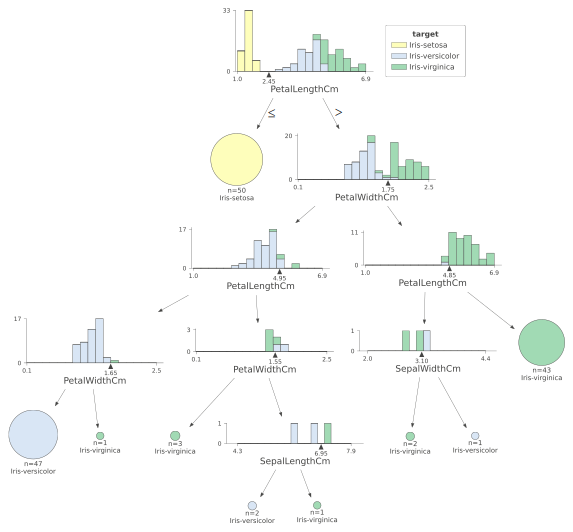

In [41]:
viz=dtreeviz(clf,X,Y,target_name='target',feature_names=y,class_names=list(target))
viz